In [1]:
import os
import torch
import torchvision
import torchvision.transforms as T
import base64
import io

import PIL.Image as Image

from matplotlib import pyplot as pl
import matplotlib.image as mpimg

import vision_explanation_methods
import vision_explanation_methods.DRISE_runner as dr
from vision_explanation_methods.error_labeling.error_labeling import (
    ErrorLabeling, ErrorLabelType)
from ml_wrappers.model.image_model_wrapper import PytorchDRiseWrapper

from vision_explanation_methods.explanations import drise


device = "cuda:0"

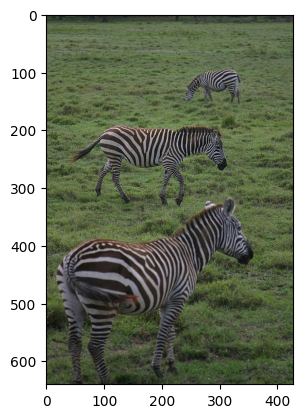

In [2]:
image = mpimg.imread("./test_imgs/test_img3.jpg")
pl.figure()
pl.imshow(image)


In [3]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
        pretrained=True)

c:\Users\natalieisak\Anaconda3\envs\aml_rotation\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\natalieisak\Anaconda3\envs\aml_rotation\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
model.eval()
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [5]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
        pretrained=True)
model.to(device)
drise_model = PytorchDRiseWrapper(model=model,number_of_classes=25)

In [6]:
imgs, name, lst = dr.get_drise_saliency_map("./test_imgs/test_img3.jpg",
                                            drise_model,
                                            25,
                                            "test",
                                            max_figures=20000)

  0%|          | 0/25 [00:00<?, ?it/s]c:\Users\natalieisak\Anaconda3\envs\aml_rotation\lib\site-packages\torchvision\transforms\transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
100%|██████████| 24/24 [00:00<00:00, 149.38it/s]


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [7]:
imgdata = base64.b64decode(imgs[2])
img = Image.open(io.BytesIO(imgdata))

In [8]:
img_tensor = T.ToTensor()(image).unsqueeze(0).to(device)
detections = drise_model.predict(img_tensor)
detections

c:\Users\natalieisak\Anaconda3\envs\aml_rotation\lib\site-packages\torchvision\transforms\functional.py:149: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_numpy.cpp:205.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


[DetectionRecord()]